In [1]:
import numpy as np
SEED=0
np.random.seed(SEED)
p1 = np.array([
    [0.0,1.0,0.0,0.0,0.0,0.0], # s0
    [0.0,0.0,0.6,0.4,0.0,0.0], # s1
    [0.0,0.2,0.0,0.0,0.1,0.7], # s2
    [0.0,0.4,0.0,0.0,0.6,0.0], # s3
    [0.0,0.0,0.8,0.2,0.0,0.0], # s4
])

p2 = np.array([
    [0.0,1.0,0.0,0.0,0.0,0.0], # s0
    [0.0,0.0,0.3,0.7,0.0,0.0], # s1
    [0.0,0.3,0.0,0.0,0.7,0.0], # s2
    [0.0,0.2,0.0,0.0,0.1,0.7], # s3
    [0.0,0.0,0.5,0.5,0.0,0.0], # s4
])

action_map = {
    '01':'D',
    '12':'D',
    '13':'R',
    '21':'U',
    '24':'R',
    '31':'L',
    '34':'D',
    '42':'L',
    '43':'U',
    '25':'D',
    '35':'R'
}

S = np.array([0,1,2,3,4,5])

In [2]:
n_samples = 100

Ts = []
As = []
Ps = []

for i in range(n_samples):
    trajectory = []
    actions = []
    players = []
    
    s_t = 1
    trajectory = [s_t]
    # choose first turn player
    start_turn = np.random.choice(
            ['p1','p2'],p=[0.5,0.5])
    turn = start_turn
    #s_p.append(start_turn)

    while s_t != S[-1]:
        players.append(turn)
        
        if turn == 'p1':
            s_tp1 = np.random.choice(S, p=p1[s_t])
            turn = 'p2'
        else:
            s_tp1 = np.random.choice(S, p=p2[s_t])
            turn = 'p1'
            
        transition = str(s_t)+str(s_tp1)
        action = action_map[transition]
        
        trajectory.append(s_tp1)
        actions.append(action)
        
        s_t = s_tp1
        
    #T.append(trajectory)
    #w_p.append(turn)
    print('started: {}\tLost:{}\tT_Len:{}\nT:{}\nA:{}\nP:{}'.format(
        start_turn,turn,len(trajectory), trajectory,actions,players))
    
    Ts.append(trajectory)
    As.append(actions)
    Ps.append(players)

started: p2	Lost:p2	T_Len:11
T:[1, 3, 4, 3, 4, 3, 4, 3, 4, 2, 5]
A:['R', 'D', 'U', 'D', 'U', 'D', 'U', 'D', 'L', 'D']
P:['p2', 'p1', 'p2', 'p1', 'p2', 'p1', 'p2', 'p1', 'p2', 'p1']
started: p2	Lost:p2	T_Len:7
T:[1, 3, 4, 2, 1, 2, 5]
A:['R', 'D', 'L', 'U', 'D', 'D']
P:['p2', 'p1', 'p2', 'p1', 'p2', 'p1']
started: p2	Lost:p2	T_Len:27
T:[1, 3, 4, 3, 4, 3, 1, 3, 1, 3, 4, 2, 4, 3, 4, 3, 1, 3, 4, 3, 4, 3, 1, 3, 4, 2, 5]
A:['R', 'D', 'U', 'D', 'U', 'L', 'R', 'L', 'R', 'D', 'L', 'R', 'U', 'D', 'U', 'L', 'R', 'D', 'U', 'D', 'U', 'L', 'R', 'D', 'L', 'D']
P:['p2', 'p1', 'p2', 'p1', 'p2', 'p1', 'p2', 'p1', 'p2', 'p1', 'p2', 'p1', 'p2', 'p1', 'p2', 'p1', 'p2', 'p1', 'p2', 'p1', 'p2', 'p1', 'p2', 'p1', 'p2', 'p1']
started: p2	Lost:p2	T_Len:21
T:[1, 2, 1, 3, 1, 3, 4, 3, 1, 2, 1, 3, 1, 3, 1, 2, 1, 3, 1, 2, 5]
A:['D', 'U', 'R', 'L', 'R', 'D', 'U', 'L', 'D', 'U', 'R', 'L', 'R', 'L', 'D', 'U', 'R', 'L', 'D', 'D']
P:['p2', 'p1', 'p2', 'p1', 'p2', 'p1', 'p2', 'p1', 'p2', 'p1', 'p2', 'p1', 'p2', 'p1', 'p2',

In [3]:
As[1]

['R', 'D', 'L', 'U', 'D', 'D']

In [4]:
L = [len(a) for a in As]

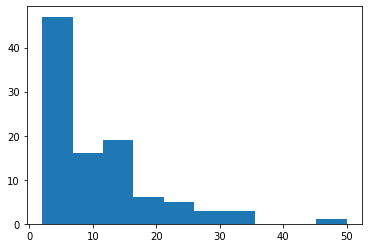

In [5]:
import matplotlib.pyplot as plt

plt.hist(L, bins=10)
plt.show()

In [6]:
len(As)

100

In [7]:
import torch
from torch.utils.data import Dataset


In [122]:
class MatchDataset(Dataset):
    def __init__(self, As, Ps):
        self.actions = As
        self.players = Ps
    def __len__(self):
        return len(self.actions)
    def __getitem__(self,idx):
        ret = {}
        ret['actions_in'] = self._action_map(self.actions[idx])[:-1] 
        ret['players_in'] = self._player_map(self.players[idx])[:-1]
        ret['actions_out'] = self._action_map(self.actions[idx])[1:]
        ret['players_out'] = self._player_map(self.players[idx])[1:]
        ret['len'] = len(ret['actions_in'])
        return ret
    
    def _action_map(self, actions):
        action_map = {'U':1,'R':2,'D':3,'L':4}
        ret = [0]+[action_map[a] for a in actions]
        return torch.tensor(ret)
    def _player_map(self, players):
        player_map = {'p1':1,'p2':2}
        ret = [player_map[players[1]]]+[player_map[p] for p in players]
        return torch.tensor(ret) 

ds = MatchDataset(As,Ps)
ds[0]

{'actions_in': tensor([0, 2, 3, 1, 3, 1, 3, 1, 3, 4]),
 'players_in': tensor([1, 2, 1, 2, 1, 2, 1, 2, 1, 2]),
 'actions_out': tensor([2, 3, 1, 3, 1, 3, 1, 3, 4, 3]),
 'players_out': tensor([2, 1, 2, 1, 2, 1, 2, 1, 2, 1]),
 'len': 10}

In [123]:
import torch.nn as nn
import torch.nn.functional as F

class Embedder(nn.Module):
    def __init__(self,emb_data, emb_dim):
        super(Embedder,self).__init__()
        self.action_embedder = nn.Embedding(emb_data['action_space_size'], emb_dim)
        self.player_embedder = nn.Embedding(emb_data['player_space_size'], emb_dim)
        
    def forward(self, action, player):
        emb_action = self.action_embedder(action)
        emb_player = self.player_embedder(player)
        return emb_action, emb_player

    
class Net(nn.Module):
    def __init__(self, emb_data, emb_dim, hidden_dim):
        super(Net,self).__init__()
        self.emb_data = emb_data
        self.emb_dim = emb_dim
        self.hidden_dim = hidden_dim
        
        # takes (action, player) as numbers
        self.embedder = Embedder(emb_data,emb_dim)
        
        self.linear1 = nn.Linear(emb_dim+emb_dim+hidden_dim,emb_dim)
        self.action_selector = nn.Linear(emb_dim,self.emb_data['action_space_size'])
        self.state_projector = nn.Linear(emb_dim,hidden_dim)
        
    def forward(self, action, player, hidden):
        e_action, e_player = self.embedder(action, player)
        cat_emb = torch.cat([e_action, e_player, hidden])
        
        x = self.linear1(cat_emb)
        x = F.relu6(x)
        
        next_action = self.action_selector(x)
        next_hidden = self.state_projector(x)
        
        next_action = F.softmax(next_action,-1)
        next_hidden = torch.tanh(next_hidden)

        return next_action, next_hidden

emb_data = {'action_space_size':4+1,'player_space_size':2+1}
emb_dim = 32
hidden_dim = 32
bot1 = Net(emb_data, emb_dim, hidden_dim)
bot2 = Net(emb_data, emb_dim, hidden_dim)

In [73]:
log_loss = []
ce_loss = nn.CrossEntropyLoss()
# opt = torch.optim.Adam(bot1.parameters(), 0.01)
# params = list(bot1.parameters()) + list(bot2.parameters())
opt = torch.optim.SGD(bot1.parameters(), 0.01)
# opt2 = torch.optim.SGD(bot2.parameters(), 0.01)


In [117]:
for i in range(len(ds)):
    batch = ds[i]
    hidden = torch.zeros(hidden_dim)
    
    loss = 0
    opt.zero_grad()
    for j in range(batch['len']):
        a_in = batch['actions_in'][j]
        p_in = batch['players_in'][j]
        a_out = batch['actions_out'][j]
        p_out = batch['players_out'][j]

        out, hidden = bot1(a_in,p_in,hidden)
        l = ce_loss(out.reshape([1,-1]), a_out.reshape([1]))
        loss += l
    loss /= batch['len']
    loss.backward()
    opt.step()
    log_loss += [loss.item()] 
print('done')

done


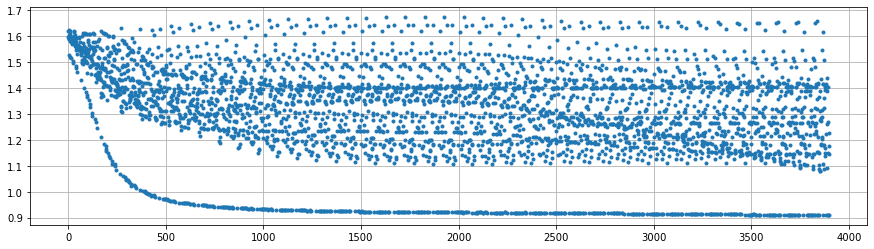

In [119]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15,4))
plt.plot(log_loss,'.')
plt.grid()
plt.show()

In [125]:
log_loss = []
ce_loss = nn.CrossEntropyLoss()
# opt = torch.optim.Adam(bot1.parameters(), 0.01)
params = list(bot1.parameters()) + list(bot2.parameters())
opt = torch.optim.SGD(params, 0.01)
#opt2 = torch.optim.SGD(bot2.parameters(), 0.01)


In [172]:
for i in range(len(ds)):
    batch = ds[i]
    hidden = torch.zeros(hidden_dim)
    
    loss = 0
    opt.zero_grad()
    for j in range(batch['len']):
        a_in = batch['actions_in'][j]
        p_in = batch['players_in'][j]
        a_out = batch['actions_out'][j]
        p_out = batch['players_out'][j]

        if p_in == 1:
            out, hidden = bot1(a_in,p_in,hidden)
        elif p_in == 2:
            out, hidden = bot2(a_in,p_in,hidden)
            
        l = ce_loss(out.reshape([1,-1]), a_out.reshape([1]))
        loss += l
        
    loss /= batch['len']
    loss.backward()
    opt.step()
    log_loss += [loss.item()] 
print('done')

done


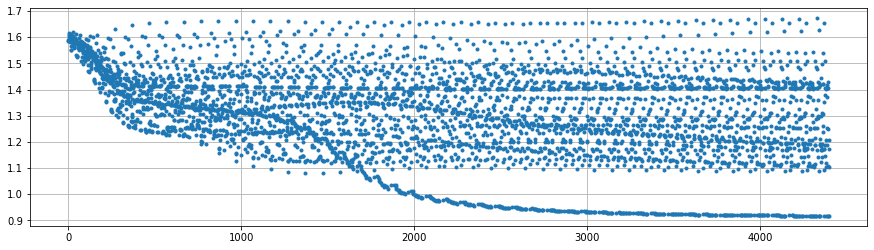

In [173]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15,4))
plt.plot(log_loss,'.')
plt.grid()
plt.show()

In [12]:
# for i in range(len(ds)):
#     batch = ds[i]
#     hidden = torch.zeros(hidden_dim)
#     loss1 = 0
#     loss2 = 0
#     opt1.zero_grad()
#     opt2.zero_grad()
#     for j in range(batch['len']):
#         a_in = batch['actions_in'][j]
#         p_in = batch['players_in'][j]
#         a_out = batch['actions_out'][j]
#         p_out = batch['players_out'][j]

#         if p_in == 1: 
#             out, hidden = bot1(a_in,p_in,hidden)
#             l = ce_loss(out.reshape([1,-1]), a_out.reshape([1]))
#             loss1 += l
#         elif p_in == 2:
#             out, hidden = bot2(a_in,p_in,hidden)
#             l = ce_loss(out.reshape([1,-1]), a_out.reshape([1]))
#             loss2 += l
        
#     loss1.backward(retain_graph=True)
#     opt1.step()
#     loss2.backward(retain_graph=True)
#     opt2.step()
#     log_loss += [loss1.item()+loss2.item()] 
# print('done')

RuntimeError: one of the variables needed for gradient computation has been modified by an inplace operation: [torch.FloatTensor [48, 16]], which is output 0 of AsStridedBackward0, is at version 2; expected version 1 instead. Hint: enable anomaly detection to find the operation that failed to compute its gradient, with torch.autograd.set_detect_anomaly(True).

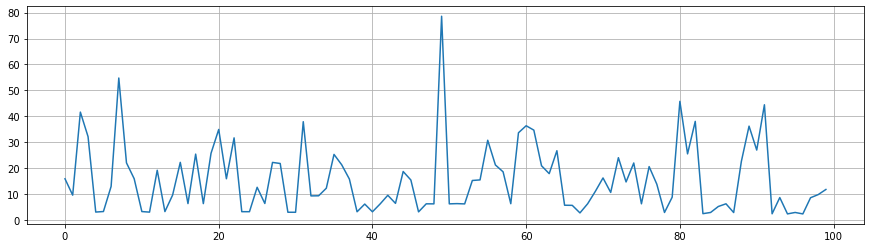

In [86]:
out

tensor([0.2435, 0.1808, 0.1685, 0.2243, 0.1829], grad_fn=<SoftmaxBackward0>)